In [1]:
cd '/home/dpirvu/axion_new/'

/home/dpirvu/axion_new


In [2]:
import os,sys

print(sys.path)

#sys.path.remove('/home/dpirvu/DarkPhoton/hmvec-master')
sys.path.remove('/home/dpirvu/DarkPhotonxunWISE/hmvec-master')
sys.path.append('/home/dpirvu/axion_new/hmvec-master/')
sys.path.append('/home/dpirvu/python_stuff/')

print(sys.path)

import hmvec as hm

from plotting import *
from compute_power_spectra import *
from params import *

%matplotlib inline

np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)


['/home/dpirvu', '/cm/shared/apps/python/python37/lib/python37.zip', '/cm/shared/apps/python/python37/lib/python3.7', '/cm/shared/apps/python/python37/lib/python3.7/lib-dynload', '', '/home/dpirvu/.local/lib/python3.7/site-packages', '/home/dpirvu/DarkPhotonxunWISE/hmvec-master', '/cm/shared/apps/python/python37/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages/IPython/extensions', '/home/dpirvu/.ipython']
['/home/dpirvu', '/cm/shared/apps/python/python37/lib/python37.zip', '/cm/shared/apps/python/python37/lib/python3.7', '/cm/shared/apps/python/python37/lib/python3.7/lib-dynload', '', '/home/dpirvu/.local/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages', '/cm/shared/apps/python/python37/lib/python3.7/site-packages/IPython/extensions', '/home/dpirvu/.ipython', '/home/dpirvu/axion_new/hmvec-master/', '/home/dpirvu/python_stuff/']


In [3]:
def beautify(ax, ncol=1, ttl=None, bb=None):
    try:
        len(ax)
    except:
        ax = np.array([ax])
    legs = []
    for ai, aa in enumerate(ax.flatten()):
        aa.grid(which='both', ls=':', color='lightgray', alpha=0.7)
        aa.tick_params(direction='in', which='both', top=True, right=True)
        #aa.ticklabel_format(axis='both', style='scientific', scilimits=[0.,0.])
        aa.xaxis.set_label_coords(0.5, -0.15)
        aa.yaxis.set_label_coords(-0.15, 0.5)
        aa.xaxis.label.set_color('k')
        aa.yaxis.label.set_color('k')
        aa.tick_params(axis='x', colors='k')
        aa.tick_params(axis='y', colors='k')
        aa.tick_params(direction='in', which='both', bottom=None, left=None, top=None, right=None)
        aa.spines['left'].set_color('k')
        aa.spines['right'].set_color('k')
        aa.spines['top'].set_color('k')
        aa.spines['bottom'].set_color('k')
        leg = aa.legend(title=ttl, ncol=ncol, bbox_to_anchor=bb, frameon=False, handlelength=1.5, labelspacing=0.3, columnspacing=0.6)
        legs.append(leg)
    return np.array(legs), ax

# Define function for string formatting of scientific notation
def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if exponent is None:
        exponent = int(np.floor(np.log10(abs(num))))
    coeff = round(num / float(10.**exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits

    return r"${0:.{2}f}\times 10^{{{1:d}}}$".format(coeff, exponent, precision)
 #   return r"$10^{{{1:d}}}$".format(coeff, exponent, precision)

def clear_last_coln(ax, title=None):
    ax[len(ax)-1].legend(loc='center', ncol=1, frameon=False, title=title)
    ax[len(ax)-1].set_ylim((-1,0))
    ax[len(ax)-1].set_xlim((-1,0))
    ax[len(ax)-1].spines['right'].set_visible(False)
    ax[len(ax)-1].spines['left'].set_visible(False)
    ax[len(ax)-1].spines['top'].set_visible(False)
    ax[len(ax)-1].spines['bottom'].set_visible(False)
    ax[len(ax)-1].axes.yaxis.set_ticklabels([])
    ax[len(ax)-1].axes.xaxis.set_ticklabels([])
    ax[len(ax)-1].grid(False)
    ax[len(ax)-1].tick_params(left = False,top = False,right = False,bottom = False)
    return ax


In [4]:
ellMax0 = 9600

ellshort = np.array([0.] + np.geomspace(2, ellMax0, 99).tolist() + [ellMax0-1])
ellshort = np.array([int(ii) for ii in ellshort])
ellshort = np.array(list(dict.fromkeys(ellshort)))

dictmasses = dictKey[::]; print(len(dictmasses))
model = modelParams
rscale = False

allcols = ['#377eb8', '#ff7f00', 'forestgreen', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']
cych = cycle(allcols)

multiList = [1., 5., 10.]

epsilon= 1.e-19

baseline = ghztoev(145)
units = xov(baseline) * baseline**2.

zreio = 1.9

zMin = 0.005
zMax = zreio

nZs  = 50
nMs  = 100

fsky = 0.4

nspec  = 1
nfreqs = 7

rs  = np.linspace(1e-6, 1e2, 10000)              # halo radius

65


In [5]:
ms  = np.geomspace(1e11,1e17,nMs)   # masses
zs  = np.linspace(0.005,zreio,nZs)  # redshifts
ks  = np.geomspace(1e-4,1e3, 1001)  # wavenumbers

name = 'battagliaAGN'
unwise_color = 'blue'
choose_dict = 21
rscale = False

if unwise_color=='blue': pathdndz = "/home/dpirvu/DarkPhotonxunWISE/dataHOD/normalised_dndz_cosmos_0.txt"
elif unwise_color=='green': pathdndz = "/home/dpirvu/DarkPhotonxunWISE/dataHOD/normalised_dndz_cosmos_1.txt"

# Halo Model
hcos = hm.HaloModel(zs, ks, ms=ms, mass_function='tinker', mdef='vir', concmode='BHATTACHARYA', unwise_color=unwise_color, choose_dict=choose_dict)

print('Importing base CMB PS and adding T monopole.')
CMB_ps        = hcos.CMB_power_spectra()
lensedCMB     = CMB_ps['lensed_scalar']
lensedCMB     = lensedCMB[:ellMax0, :]
lensedCMB[0,0]= TCMB**2.

unwise_color blue choose_dict 21 hod_params {'hod_alphasat': 1.06, 'hod_siglogM': 0.02, 'hod_lambda': 1.8, 'hod_M1pr_satdivh': 4074000000000.0, 'hod_Mmin_cendivh': 489780000000.0}
Importing base CMB PS and adding T monopole.


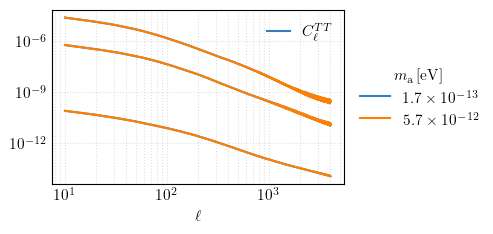

In [6]:
fig = plt.figure(figsize=(5.,2.5))
cych = cycle(allcols)
gs = gridspec.GridSpec(1, 4, figure=fig)
ax1 = fig.add_subplot(gs[0, :3])
ax3 = fig.add_subplot(gs[0, 3:])
ax = np.array([ax1, ax3])

ct = 0
for mind, MA in enumerate(dictmasses):
    if mind%50!=3:continue
    col = next(cych)
    
    mm, mmm = 10, 4000
    ells = np.arange(mm, mmm)

    dt = 0
    for multi in multiList:
        lab1 = (sci_notation(MA) if dt==0 else None)
        labtot = (r'$C_\ell^{TT}$' if ct==0 else None)
        
        path = new_test_data(nZs, zMin, zMax, ellMax0, multi, rscale)
        avtau, dtaudz, rcross, uell0, prob, Cell1Halo, Cell2Halo, CMBDP = np.load(path)

        scrTT = (Cell1Halo + Cell2Halo) * TCMB**2 * units**2.

        ax[0].plot(ells, scrTT[mm:mmm], alpha=1, color=col, label=labtot)
        ax[1].plot(ells, scrTT[mm:mmm], alpha=1, color=col, label=lab1)
        ct += 1
        dt += 1

legs, ax = beautify(ax)
clear_last_coln(ax, title=r'$m_{\rm a} \, [{\rm eV}]$')
for aa, axx in enumerate(ax[:-1]):
    axx.set_xlabel(r'$\ell$')
    axx.set_xscale('log'); axx.set_yscale('log')
fig.tight_layout()
fig.show()


In [7]:
for eind, (expname, experiment) in enumerate(zip(['Planck', 'CMBS4'], [Planck, CMBS4])):
    if expname == 'Planck':
        elllim = 4000
        Nell, Fell = get_noise_and_foregrounds_Planck(TCMB, elllim_Planck=elllim, nfreqs_Planck=nfreqs)

    elif expname == 'CMBS4':
        elllim = 9000
        Nell, Fell = get_noise_and_foregrounds_S4(TCMB, elllim_S4=elllim, nfreqs_S4=nfreqs)

    for multi in multiList:
        avtau, dtaudz, rcross, uell0, prob, Cell1Halo, Cell2Halo, CMBDP = np.load(new_test_data(nZs, zMin, zMax, ellMax0, multi, rscale))
        scrTT = (Cell1Halo + Cell2Halo) * TCMB**2 * units**2.

        for doforegs in [True, False]:
            if doforegs:
                foregs = Fell
                patha = new_weights_path(expname, zreio, multi)
                pathb = new_ILCnoisePS_path(expname, zreio, multi)
            else:
                foregs = Nell
                patha = new_weights_path(expname, zreio, multi)+'_nofg.npy'
                pathb = new_ILCnoisePS_path(expname, zreio, multi)+'_nofg.npy'

            epsilon = 1e-20
            screen = scrTT * epsilon**4.
            reco   = lensedCMB.T[0,:elllim]

            weights, leftoverdata = get_ILC_noise(elllim, units, screen, foregs, reco, experiment, nspec, nfreqs)
            np.save(patha, weights)
            np.save(pathb, leftoverdata)
        print(expname, 'done')


Planck done
Planck done
Planck done
CMBS4 done
CMBS4 done
CMBS4 done


In [8]:
def sets(ax):
    beautify(ax, ttl=None, ncol=2)
    clear_last_coln(ax)
    ax[0].set_ylim((1e-8,1e2))
    ax[1].set_ylim((1e-8,1e-1))
    ax[2].set_ylim((1e-8,1e-1))
    for ai, ax in enumerate(ax[:-1]):
        ax.set_xlabel(r'$\ell$')
        ax.legend(title=[r'$\rm TT$', r'$\rm EE$', r'$\rm BB$'][ai], frameon=False)
        ax.set_xscale('log')
        ax.set_yscale('log')
    plt.tight_layout()
    plt.show()
    return

def expsets(experiment):
    freqs = experiment['freqsGHz']
    if expname=='Planck':
        mm, mmm = 10, 3000
        Nell, Fell = get_noise_and_foregrounds_Planck(TCMB, elllim_Planck=mmm, nfreqs_Planck=nfreqs)

    elif expname=='CMBS4':
        mm, mmm = 10, 9000
        Nell, Fell = get_noise_and_foregrounds_S4(TCMB, elllim_S4=mmm, nfreqs_S4=nfreqs)
    return freqs, Nell, Fell, mm, mmm

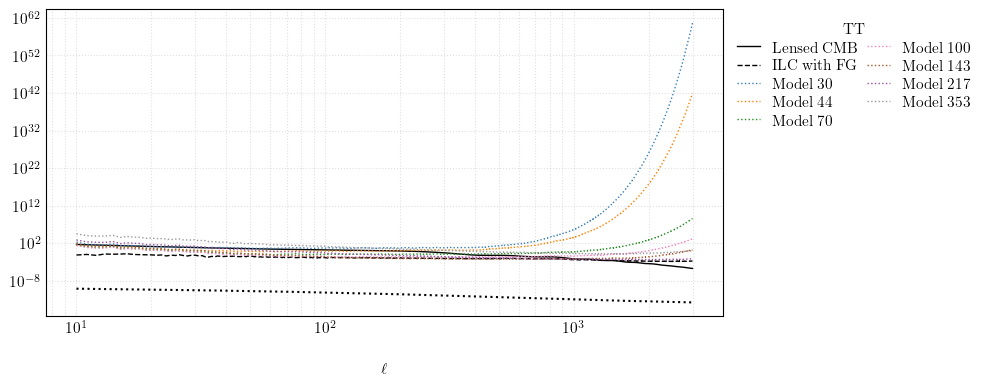

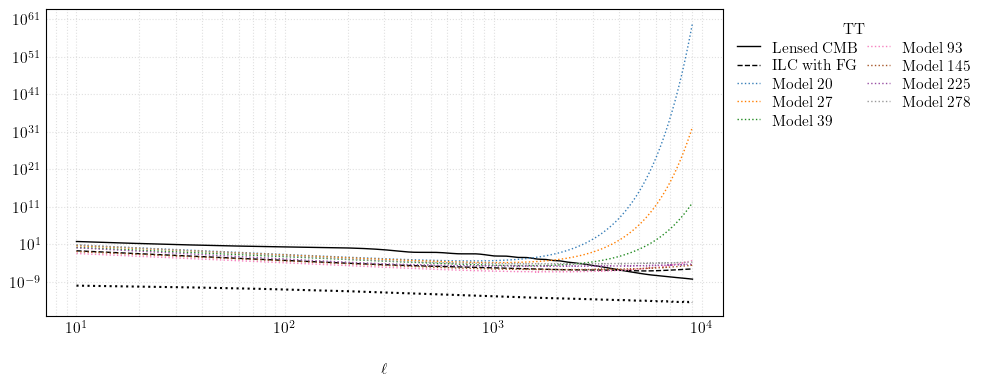

In [9]:
for eid, (expname, experiment) in enumerate(zip(['Planck', 'CMBS4'], [Planck, CMBS4])):

    fig, ax = plt.subplots(1, 1, figsize=(10, 4.))
    freqs, Nell, Fell, mm, mmm = expsets(experiment)
    elss = np.arange(mm, mmm)

    for multi in multiList:
        if multi!=1: continue
        ILCnoise      = np.load(new_ILCnoisePS_path(expname, zreio, multi))

        l1, = ax.plot(elss, lensedCMB[mm:mmm, 0],  lw=1, color='k', ls='-',label=r'$\rm Lensed \; CMB$')
        l2, = ax.plot(elss, ILCnoise[mm:mmm],      lw=1, color='k', ls='--', label=r'$\rm ILC \; with \; FG$')

        path = new_test_data(nZs, zMin, zMax, ellMax0, multi, rscale)
        avtau, dtaudz, rcross, uell0, prob, Cell1Halo, Cell2Halo, CMBDP = np.load(path)

        ax.plot(elss, (Cell1Halo + Cell2Halo)[mm:mmm] * TCMB**2. * units**2., ls=':', color='k', label=labtot)

        for fi, frq in enumerate(freqs[:7]):
            lab = r'${{\rm Model \;}}{:.0f}$'.format(frq)
            ax.plot(elss, Fell[mm:mmm, fi, np.mod(fi+0,len(freqs))], color=allcols[fi], linewidth=1, alpha=1, ls=':', label=lab)

    beautify(ax, ttl=r'$\rm TT$', ncol=2, bb=(1,1))
#    ax.set_ylim((1e-8,1e5))
 #   ax.set_ylim((1e-7,1e2))
    ax.set_xlabel(r'$\ell$')
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.tight_layout()
    plt.show()


epsilon =  1e-20
(4000, 7)


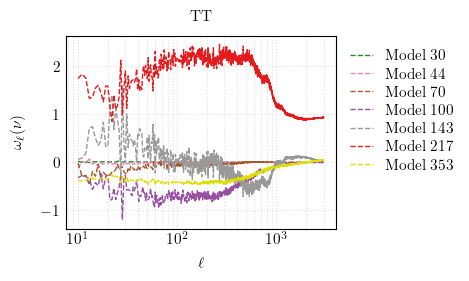

epsilon =  1e-20
(9000, 7)


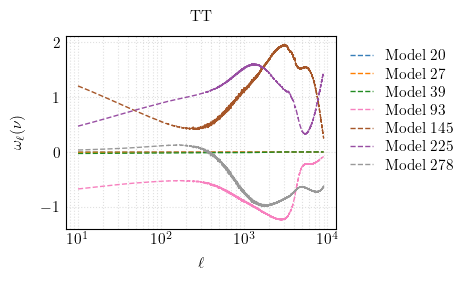

In [10]:
for expname, experiment in zip(['Planck', 'CMBS4'], [Planck, CMBS4]):
    fig, ax = plt.subplots(1, 1, figsize=(5, 3.))
    freqs, Nell, Fell, mm, mmm = expsets(experiment)
    freqs = freqs[:nfreqs]

    mind = 4
    MA = dictmasses[mind]
    print('epsilon = ', epsilon)


    elss = np.arange(mm, mmm)
    ILCweight= np.load(new_weights_path(expname, zreio, multi))
    print(np.shape(ILCweight))
    for jj, frq in enumerate(freqs[:nfreqs]):
        lab = r'${{\rm Model \;}}{:.0f}$'.format(frq)
        l2, = ax.plot(elss, ILCweight[mm:mmm, jj], lw=1, color=next(cych), ls='--', label=lab)

    beautify(ax, bb=(1.,1.))
    noiselab = r'$C_\ell^{\rm TT}$'
    ax.set_ylabel(r'$\omega_\ell(\nu)$')
    ax.set_xlabel(r'$\ell$')
    ax.set_title(r'\rm TT')
    ax.set_xscale('log')
    plt.tight_layout()
    plt.show()

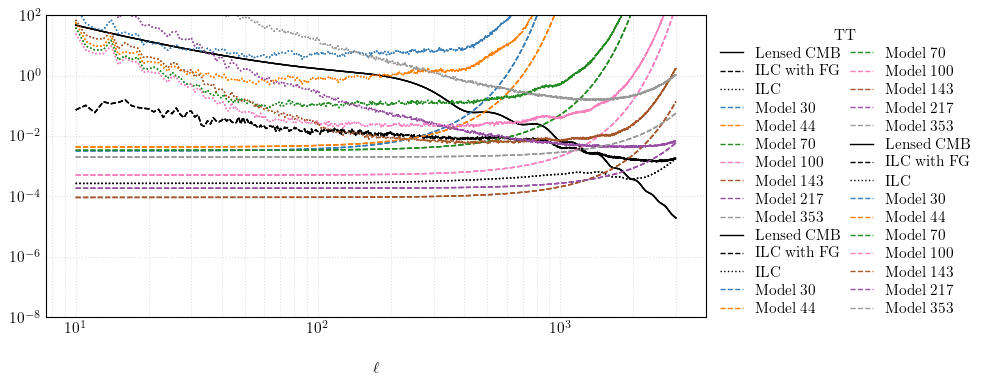

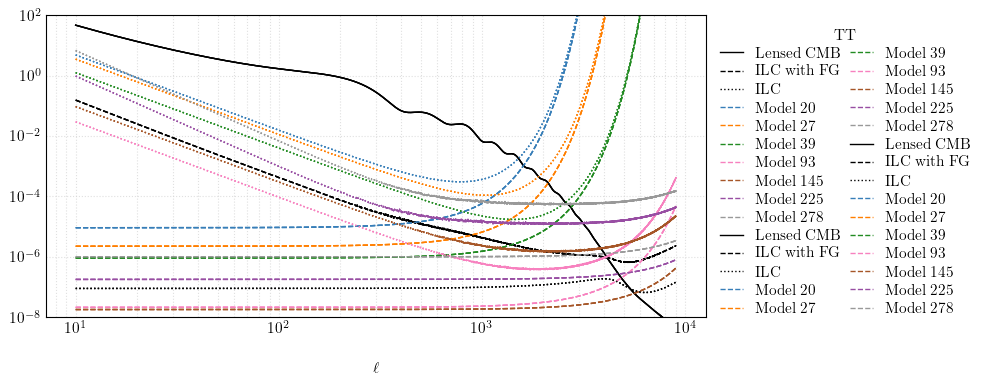

In [11]:
for eid, (expname, experiment) in enumerate(zip(['Planck', 'CMBS4'], [Planck, CMBS4])):
    fig, ax = plt.subplots(1, 1, figsize=(10, 4.))
    freqs, Nell, Fell, mm, mmm = expsets(experiment)
    elss = np.arange(mm, mmm)

    for multi in multiList:
        ILCnoise      = np.load(new_ILCnoisePS_path(expname, zreio, multi))
        ILCnoise_nofg = np.load(new_ILCnoisePS_path(expname, zreio, multi)+'_nofg.npy')

        l1, = ax.plot(elss, lensedCMB[mm:mmm, 0],  lw=1, color='k', ls='-',label=r'$\rm Lensed \; CMB$')
        l2, = ax.plot(elss, ILCnoise[mm:mmm],      lw=1, color='k', ls='--', label=r'$\rm ILC \; with \; FG$')
        l3, = ax.plot(elss, ILCnoise_nofg[mm:mmm], lw=1, color='k', ls=':', label=r'$\rm ILC$')

        for fi, frq in enumerate(freqs[:7]):
            lab = r'${{\rm Model \;}}{:.0f}$'.format(frq)
            ax.plot(elss, Nell[mm:mmm, fi, np.mod(fi+0,len(freqs))], color=allcols[fi], linewidth=1, alpha=1, ls='--', label=lab)

            ax.plot(elss, Fell[mm:mmm, fi, np.mod(fi+0,len(freqs))], color=allcols[fi], linewidth=1, alpha=1, ls=':')

    beautify(ax, ttl=r'$\rm TT$', ncol=2, bb=(1,1))
    ax.set_ylim((1e-8,1e2))
    ax.set_xlabel(r'$\ell$')
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.tight_layout()
    plt.show()


#### Contour Plot

In [12]:
sigmaEpsilonList = np.ones((len(multiList), 2, 2)) # experiment, methods
for mu, multi in enumerate(multiList):
    print(multi)
    for eind, (expname, experiment) in enumerate(zip(['Planck', 'CMBS4'], [Planck, CMBS4])):
        if expname=='Planck':
            mm, mmm = 10, 3000
        if expname=='CMBS4':
            mm, mmm = 10, 6000

        ellss = np.arange(mm,mmm)
        ILCnoise = np.load(new_ILCnoisePS_path(expname, zreio, multi))

        avtau, dtaudz, rcross, uell0, prob, Cell1Halo, Cell2Halo, scrTT = np.load(new_test_data(nZs, zMin, zMax, ellMax0, multi, rscale))
        CMBDP = (Cell1Halo + Cell2Halo) * TCMB**2. * units**2.
        survey = (Cell1Halo + Cell2Halo) * units**2.

        Cell_gg_tot   = np.load(new_cl_data_galgal_path(nZs, zMin, zMax, ellMax0, name='battagliaAGN', multi=multi, galcol='blue', dictn=21))
        Cell_taug_tot = np.load(new_cl_data_galtau_path(nZs, zMin, zMax, ellMax0, name='battagliaAGN', multi=multi, galcol='blue', dictn=21))
        Cell_taug_tot = Cell_taug_tot * units * TCMB

        # first constraint: CMB screening
        screening = CMBDP
        leftover  = ILCnoise
        template  = survey

        # first constraint: CMB screening TT only
        sigmaEpsilonList[mu,eind,0] = sigma_screening_TT(0., fsky, mm, mmm, screening, leftover)

        # first constraint: CMB auto and unWISE
        sigmaEpsilonList[mu,eind,1] = sigma_screeningVunWISE(0., fsky, mm, mmm, screening, leftover, Cell_taug_tot, Cell_gg_tot)

np.save('/home/dpirvu/axion_new/data/constraints_data.npy', sigmaEpsilonList)
print('Done')

1.0
5.0
10.0
Done


In [13]:
sigmaEpsilonList = np.load('/home/dpirvu/axion_new/data/constraints_data.npy')
print(sigmaEpsilonList)

[[[46.35214008  8.80105171]
  [ 8.83861985  1.27315006]]

 [[ 5.504806    1.52175988]
  [ 1.36790543  0.32422152]]

 [[ 2.25554604  0.67348545]
  [ 0.59940515  0.16357045]]]


/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


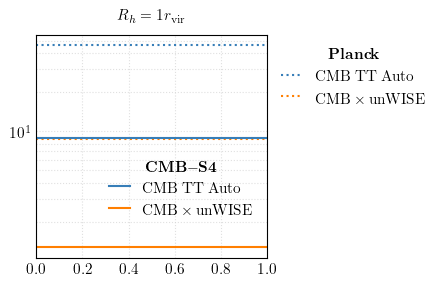

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


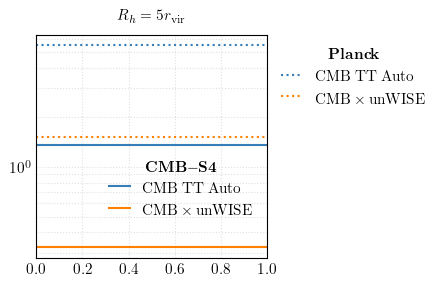

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


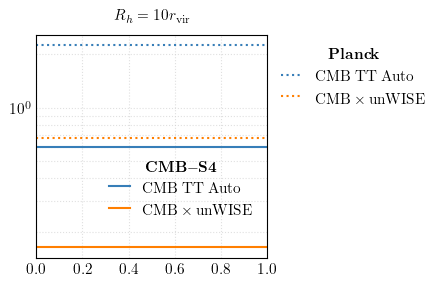

In [14]:
constraint = [r'$\rm CMB \; TT \; Auto$', \
              r'${\rm CMB} \times {\rm unWISE}$', \
              r'${\rm CMB} \times {\rm LSS}$']

for mu, multi in enumerate(multiList):
    fig, ax = plt.subplots(1, 1, figsize=(3, 3.))

    for eind, (expname, experiment) in enumerate(zip(['Planck', 'CMBS4'], [Planck, CMBS4])):
        expname = [r'$\rm \mathbf{Planck}$', r'$\rm \mathbf{CMB{-}S4}$'][eind]
        secondary_lines, secondary_labels = [], []
        for method in [0,1]:

            l1 = plt.axhline(sigmaEpsilonList[mu, eind,method], ls=[':','-'][eind], ms=2, color=allcolors[method])
            
            secondary_labels.append(constraint[method])
            secondary_lines.append(l1)
        ax.add_artist(plt.legend(secondary_lines, secondary_labels, title=expname, framealpha=1, handlelength=1.4, bbox_to_anchor=[(1.,1.), (1.,0.5)][eind], frameon=False))

    xlbl = ax.get_yticklabels(which='major')
    xlbl[:] = np.sort(sigmaEpsilonList[mu, :, :].flatten())
    ax.set_yticklabels(xlbl)

    ax.set_title(r'$R_h = {:.0f} r_{{\rm vir}}$'.format(multi))
    ax.set_yscale('log')
    beautify(ax)
    plt.tight_layout()
    plt.show()
